# SVM (Support Vector Machines)

- SVMs  choose  based  on  a simple, elegant idea: instead of thinking about separating with a line, first fit the **fattest** bar between the classes

- The SVM’s objective function incorporates the idea that a **wider bar is better**. Then once the widest bar is found, the linear discriminant will be the center line through the bar(like a solid middle line)

- The distance between the dashed parallel lines is called **the margin** around the linear discriminant, and thus the objective is to maximize the margin

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
def check_missing_data(dataset):  
    print('Qtd rows X columns:{}'.format(dataset.shape))
    print('\nAre there any Missing values?:{}'.format(dataset.isnull().values.any()))
    print('\nTotal of missing ROWS values: {}'.format(dataset.shape[0] - dataset.dropna().shape[0]))
    print('\nMissing values by columns:\n{}'.format(dataset.isnull().sum()))
    print('\nTotal sum of missing values: {}'.format(dataset.isnull().sum().sum()))
    print('\n')
    print(dataset.info())

In [8]:
df = pd.DataFrame()

df = pd.read_csv('data/2013_Video_Games_Dataset.csv')
print(df.shape)
df.head(3)

(1770, 166)


,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Re-release,Usedprice,lnUsedPrice,Review Score,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH",Action,1,1,24.95,3.216874,85,7225,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,0,0,0,0,0,4016016,"Bandai Co., Ltd., Ubisoft Entertainment SA, Ubisoft, Inc.",Strategy,0,0,14.95,2.704711,89,7921,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH","Action, Racing / Driving, Sports",1,0,22.95,3.133318,81,6561,1,0,0,0,0,2,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1


In [3]:
# df['IsGoodBuy'] = df['IsBadBuy'].map({1: 0, 0: 1})

In [10]:
check_missing_data(df)

Qtd rows X columns:(1770, 166)

Are there any Missing values?:False

Total of missing ROWS values: 0

Missing values by columns:
Console                0
Title                  0
US Sales (millions)    0
Block4                 0
Block2                 0
                      ..
Platform               0
Isometric              0
SideScrolling          0
TopDown                0
ThirdPerson            0
Length: 166, dtype: int64

Total sum of missing values: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Columns: 166 entries, Console to ThirdPerson
dtypes: float64(3), int64(159), object(4)
memory usage: 2.2+ MB
None


In [44]:
df.columns

Index(['Console', 'Title', 'US Sales (millions)', 'Block4', 'Block2', 'Block1',
       'Block0.5', 'YearReleased', '2004', '2005',
       ...
       'Tricks', 'Volleyball', 'Wakeboarding', 'Wrestling', 'FirstPerson',
       'Platform', 'Isometric', 'SideScrolling', 'TopDown', 'ThirdPerson'],
      dtype='object', length=166)

In [9]:
# df['Metadata.Publishers'].count()
# df.groupby(['Metadata.Publishers']).count()

# Pandas ALL Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# null_columns=df.columns[df.isnull().any()]
# df[df.isnull().any(axis='columns')][df.columns]


In [10]:
# Create new  Dataframe with selected values

df_games = pd.DataFrame()
df_games = df[df.columns]
df_games.head(1)


,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Re-release,Usedprice,lnUsedPrice,Review Score,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH",Action,1,1,24.95,3.216874,85,7225,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [11]:
# Remove all rows with null value from pandas data frame

#null_columns=df_cars.columns[df_cars.isnull().any()]
# we can pass either axis=1 or axos='columns' to count with respect to row
#df_cars[df_cars.isnull().any(axis='columns')][null_columns]

# df_cars = df_cars.dropna(how='any',axis=0)

selected_features = ['Console', 'Title', 'US Sales (millions)', 'YearReleased', 'Publisher', 'Genre', 'Sequel', 'Usedprice', 'lnUsedPrice', 'Review Score']

df_games[selected_features].columns



Index(['Console', 'Title', 'US Sales (millions)', 'YearReleased', 'Publisher',
       'Genre', 'Sequel', 'Usedprice', 'lnUsedPrice', 'Review Score'],
      dtype='object')

count    1770.000000
mean        0.479785
std         1.064915
min         0.010000
25%         0.090000
50%         0.190000
75%         0.450000
max        14.660000
Name: US Sales (millions), dtype: float64


<AxesSubplot:>

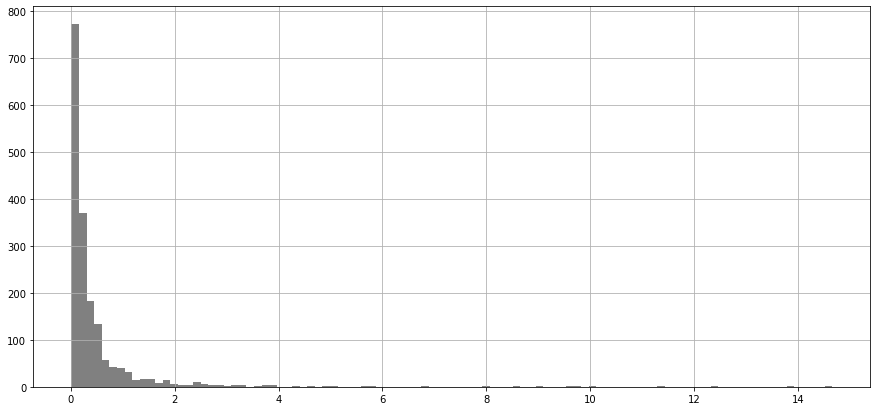

In [12]:
#df_games.info()

print (df_games['US Sales (millions)'].describe())

df_games['US Sales (millions)'].hist(figsize=(15,7), bins=100, color='grey')



In [26]:
#df_games["Title"].value_counts().plot(kind='bar', figsize=(15,10), color='k', title='Count by Titles')

<AxesSubplot:title={'center':'Count by consoles'}>

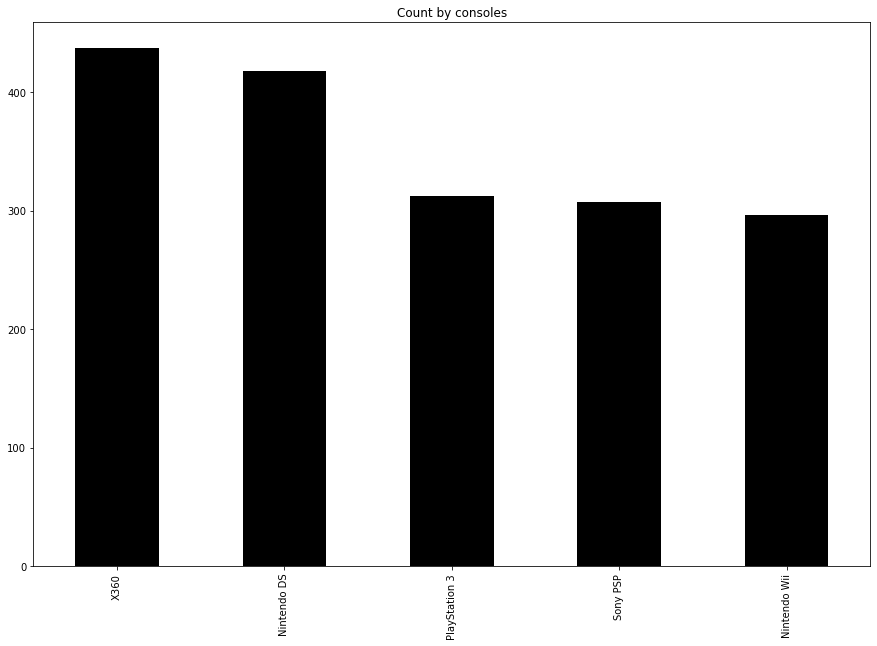

In [14]:
# df_games.corr()

# df.groupby(['Pclass','Sex','Survived'])['Age'].median()

# Index(['Console', 'Title', 'US Sales (millions)', 'YearReleased', 'Publisher',
#        'Genre', 'Sequel', 'Usedprice', 'lnUsedPrice', 'Review Score'],
#       dtype='object')

# df_games["Console"].value_counts()

# df_games.groupby(['US Sales (millions)'])["Console"].value_counts().plot(kind='bar', figsize=(15,10), color='k', title='Sales by consoles')


df_games["Console"].value_counts().plot(kind='bar', figsize=(15,10), color='k', title='Count by consoles')


# []\
# .mean().plot(kind='bar', figsize=(15,10), color='k', title='Sales by consoles')


In [30]:
df_games[selected_features].sort_values('US Sales (millions)', ascending=False)

,Console,Title,US Sales (millions),YearReleased,Publisher,Genre,Sequel,Usedprice,lnUsedPrice,Review Score
173,Nintendo Wii,Wii Play,14.66,2006,"Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH","Action, Sports",0,14.95,2.704711,58
1376,Nintendo Wii,Wii Sports Resort,13.87,2009,"Nintendo Co., Ltd., Nintendo of America Inc.","Action, Sports",1,39.95,3.687629,80
932,Nintendo Wii,Mario Kart Wii,12.39,2008,"Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Canada Ltd., Nintendo of Europe GmbH",Racing / Driving,1,29.95,3.399529,82
1377,Nintendo Wii,New Super Mario Bros. Wii,11.35,2009,"Nintendo Co., Ltd., Nintendo of America Inc.",Action,1,39.95,3.687629,87
174,Nintendo DS,New Super Mario Bros.,10.03,2006,"Nintendo Co., Ltd., Nintendo of America Inc., Nintendo of Europe GmbH",Action,1,27.95,3.330417,89
...,...,...,...,...,...,...,...,...,...,...
925,Sony PSP,Capcom Puzzle World,0.01,2007,"Capcom Entertainment, Inc., CE Europe Ltd.",Strategy,0,19.95,2.993229,65
926,Sony PSP,Puzzle Quest: Challenge of the Warlords,0.01,2007,"D3Publisher Inc., D3Publisher of America, Inc., D3Publisher of Europe Ltd.","Role-Playing (RPG), Strategy",0,17.95,2.887590,84
927,Sony PSP,Smash Court Tennis 3,0.01,2007,Namco Bandai Games America Inc.,Sports,1,19.95,2.993229,68
928,Sony PSP,Traxxpad: Portable Studio,0.01,2007,"Eidos, Inc.","Educational, Simulation",0,17.95,2.887590,78


In [31]:
df_games[selected_features]['Genre'].unique()

array(['Action', 'Strategy', 'Action, Racing / Driving, Sports', 'Sports',
       'Simulation', 'Racing / Driving',
       'Action, Adventure, Role-Playing (RPG)',
       'Action, Adventure, Racing / Driving, Sports', 'Action, Sports',
       'Racing / Driving, Simulation', 'Adventure', 'Action, Strategy',
       'Action, Racing / Driving', 'Role-Playing (RPG)',
       'Simulation, Strategy', 'Role-Playing (RPG), Simulation',
       'Action, Role-Playing (RPG)', 'Racing / Driving, Sports',
       'Adventure, Simulation', 'Action, Adventure', 'Action, Simulation',
       'Action, Racing / Driving, Role-Playing (RPG)', 'Sports, Strategy',
       'Action, Racing / Driving, Simulation',
       'Role-Playing (RPG), Strategy',
       'Action, Racing / Driving, Role-Playing (RPG), Strategy',
       'Action, Simulation, Sports', 'Action, Simulation, Strategy',
       'Racing / Driving, Simulation, Sports',
       'Action, Role-Playing (RPG), Strategy',
       'Role-Playing (RPG), Simulation, S

In [35]:
label_freq = df_games[selected_features]['Genre'].value_counts() / len(df_games)
print(label_freq)

Action                                                      0.372881
Sports                                                      0.128814
Strategy                                                    0.051412
Action, Role-Playing (RPG)                                  0.049718
Racing / Driving                                            0.041243
Role-Playing (RPG)                                          0.040113
Action, Strategy                                            0.035028
Action, Adventure                                           0.035028
Action, Racing / Driving                                    0.033898
Action, Simulation                                          0.032203
Simulation                                                  0.028249
Adventure                                                   0.019774
Action, Sports                                              0.019209
Role-Playing (RPG), Strategy                                0.016384
Racing / Driving, Sports          

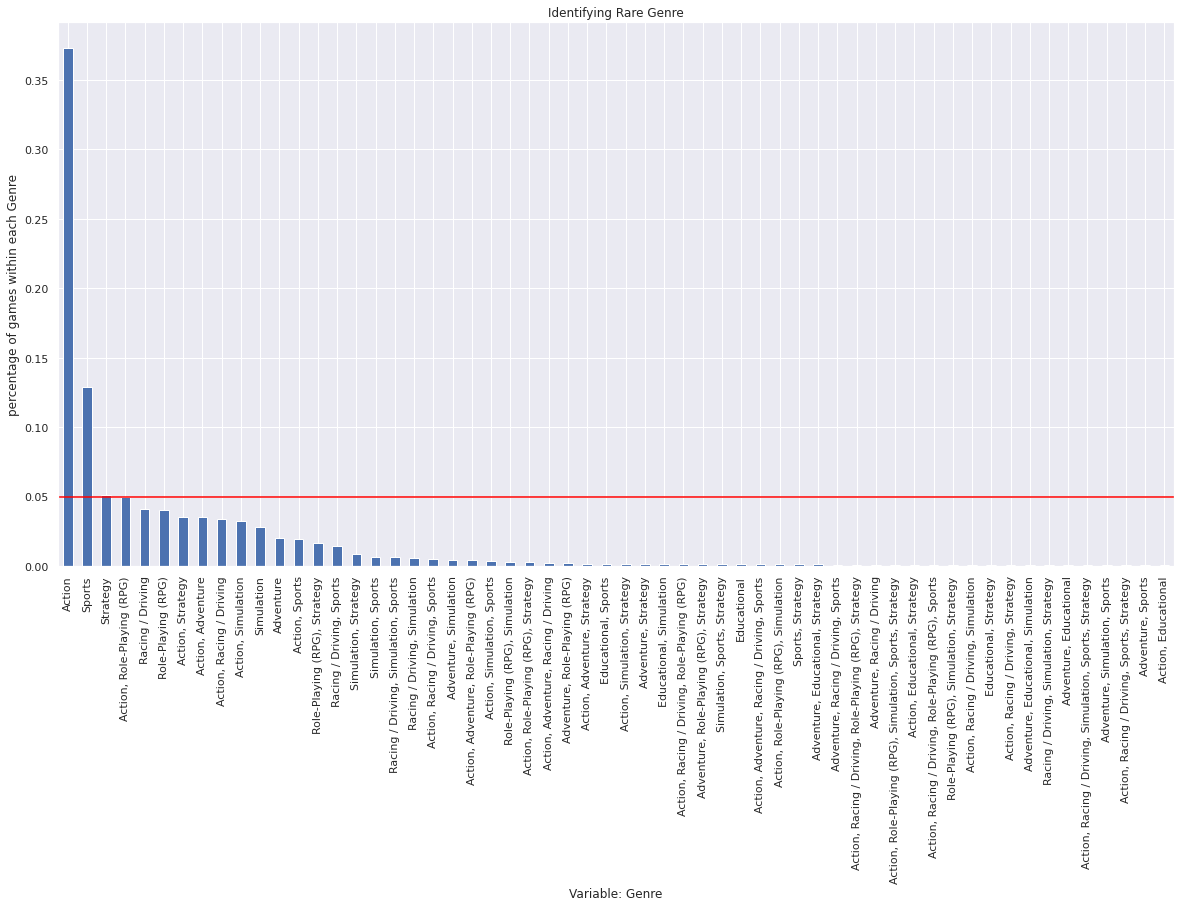

In [56]:
plt.figure(figsize=(20, 10))
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of games within each Genre')
fig.set_xlabel('Variable: Genre')
fig.set_title('Identifying Rare Genre')
plt.show()

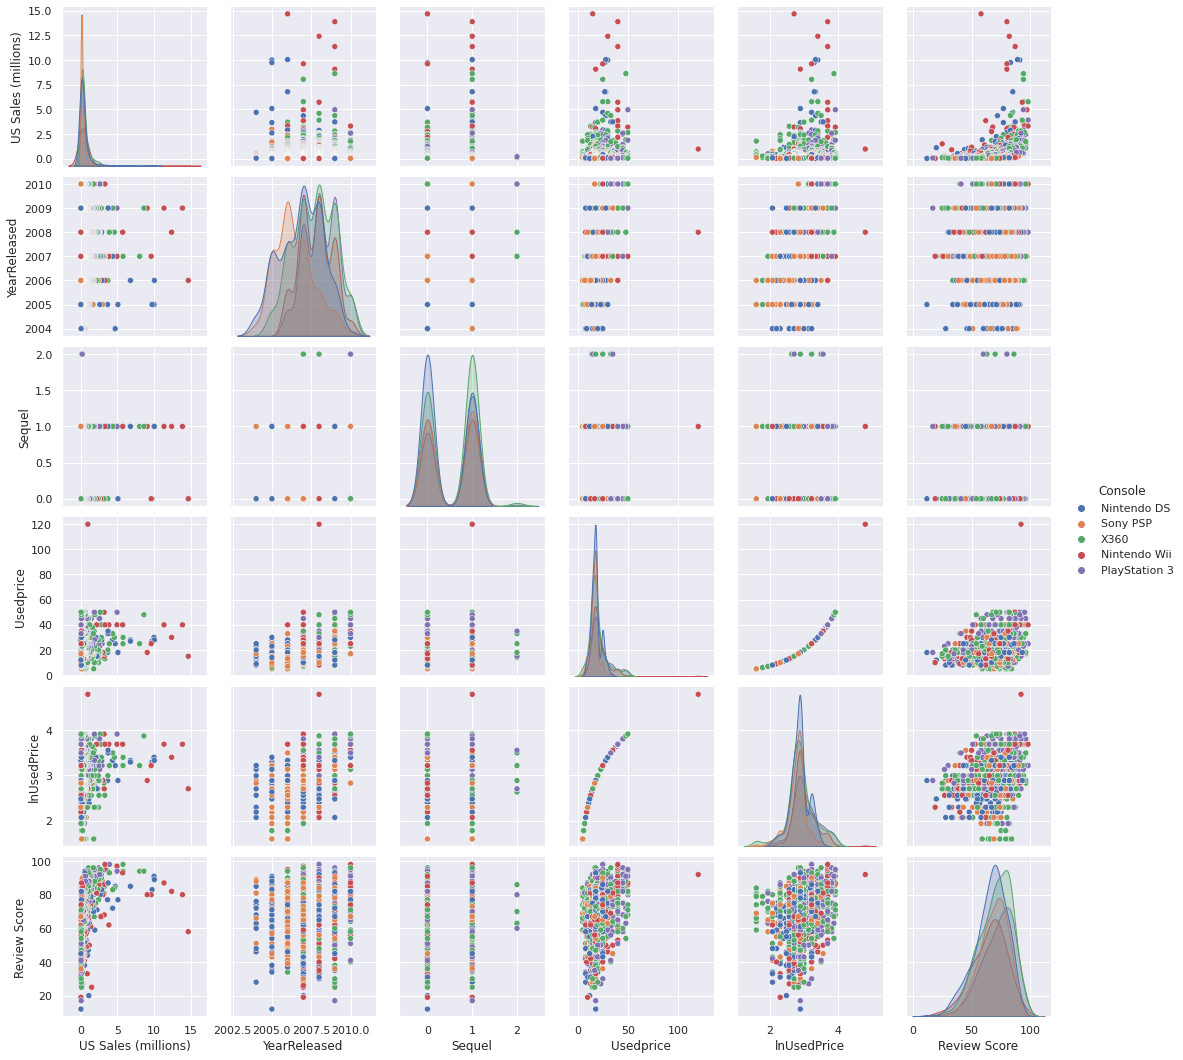

In [17]:
# sns.pairplot(iris_data[['sepal_length', 'sepal_width', 'target_names',\
#                         'petal_length', 'petal_width']], hue="target_names")

import seaborn as sns
sns.set()
sns.pairplot(df_games[selected_features], hue="Console")


In [57]:
import seaborn as sns
sns.set()

# plt.subplots(figsize=(30,30))
# sns.heatmap(df_games.corr(), annot=True)

<AxesSubplot:>

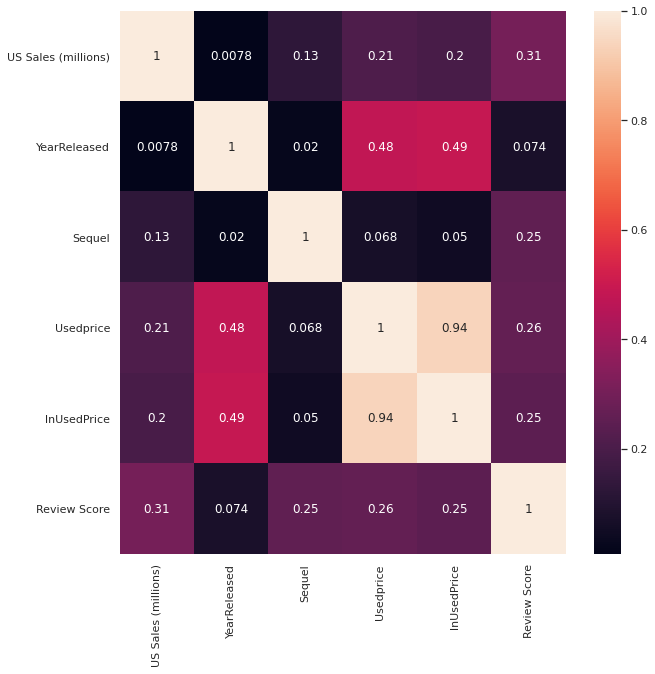

In [61]:


plt.subplots(figsize=(10,10))
sns.heatmap(df_games[selected_features].corr(), annot=True)


In [62]:
# sns.pairplot(df_cars, hue='IsBadBuy', height=2)

# 'IsGoodBuy', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'SubModel

# sns.jointplot(x="VehicleAge", y="Model", data=df_cars, hue='IsBadBuy')


In [63]:

# distinct values of the dataframe series. This will give you the column name and the cardinality
#df_cars.apply(pd.Series.nunique)


In [35]:

# df_cars.groupby(['VNST','IsBadBuy'])['Size'].median()


In [36]:
# df_cars[['Auction', 'Make', 'Model', 'SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']].nunique().plot.bar(figsize=(12,6))

# df_cars[['Auction', 'Make', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']].nunique().plot.bar(figsize=(12,6))

# plt.ylabel('Number of unique categories')
# plt.xlabel('Variables')
# plt.title('Cardinality of Categorical columns ')

In [11]:

# 'IsBadBuy'

selected_columns = ['VehYear', 'Make', 'Model', 'SubModel', 'Color', 
       'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRCurrentRetailAveragePrice',
       'VNST', 'IsOnlineSale']


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in df_cars[selected_columns] if
                    # df_cars[cname].nunique() < 10 and 
                    df_cars[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df_cars[selected_columns] if 
                df_cars[cname].dtype in ['int64', 'float64']]


print('\ncategorical_cols:{}'.format(categorical_cols))


print('\nnumerical_cols:{}'.format(numerical_cols))




categorical_cols:['Make', 'Model', 'SubModel', 'Color', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']

numerical_cols:['VehYear', 'VehOdo', 'MMRCurrentRetailAveragePrice', 'IsOnlineSale']


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']


# Split the dataset in two equal parts
X = pd.get_dummies(df_cars[selected_columns])
y = df_cars['IsBadBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# develop your "tuned parameters"
# tuned_parameter = ? 
# svc=SVC(kernel='linear')
# grid=GridSearchCV(svc,param_grid= tuned_parameters)
# grid.fit(X,y)


# Define model
# gridSVC = GridSearchCV(SVC(), tuned_parameters)


# develop your "tuned parameters"
# tuned_parameter = ? 
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid=tuned_parameters)
grid.fit(X_train, y_train)



# from sklearn import svm
# # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
# clf = svm.SVC(kernel='rbf')

# clf.fit(X_train, y_train) 

# # Bundle preprocessing and modeling code in a pipeline
# pipeGridSVC = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', gridSVC)
# ])

# # Preprocessing of training data, fit model 
# pipeGridSVC.fit(X_train, y_train)



# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()    
    
#     print("Best parameters set found on development set:")
#     print()
#     print(pipeGridSVC.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = pipeGridSVC.cv_results_['mean_test_score']
#     stds = pipeGridSVC.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, pipeGridSVC.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, pipeGridSVC.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()


In [ ]:
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Split the dataset in two equal parts
# X = pd.get_dummies(df_cars[selected_columns])
# y = df_cars['IsBadBuy']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# # Create the parameter grid: gbm_param_grid 
# gbm_param_grid = {
#     'n_estimators': range(1, 20),
#     'max_depth': range(3, 10),
#     'learning_rate': [.001, .003, .035, .4, .45, .5, .55, .6],
#     'colsample_bytree': [.1, .4, .6, .7, .8, .9, 1]
# }

# # Instantiate the regressor: gbm
# gbm = XGBClassifier(n_estimators=10)

# # Perform random search: grid_mse
# xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
#                                     estimator = gbm, scoring = "accuracy", 
#                                     verbose = 0, n_iter = 100, cv = 4)


# # Fit randomized_mse to the data
# xgb_random.fit(X_train, y_train)

# # Print the best parameters and lowest RMSE
# print("Best parameters found: ", xgb_random.best_params_)
# print("Best accuracy found: ", xgb_random.best_score_)